In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Descente de gradient : 

In [49]:
def grad_desc(df, x0, mu, eps, maxiter: int = 100000, iters = None):
    """
    mu "est la taille du mouvement"
    """
    x = x0
    for _ in range(maxiter):
        g = df(x)
        if iters is not None:
            iters.append(x.copy())
        if np.linalg.norm(g) < eps:
            break

        else:
            x = x-mu*g
        
    return x


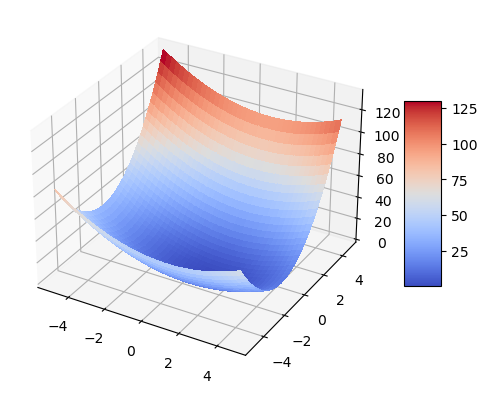

In [42]:
def ftest(x, y):
    return (x - 1) ** 2 + 3*(y + 1)**2

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = ftest(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [37]:
def f_test_grad(x):
    return x * np.array([2, 6]) + np.array([-2, 6])

In [53]:
# test de la descente : 
iters = []
x_min = grad_desc(f_test_grad,x0=np.array([0,0]), mu=0.01, eps=10e-8, iters = iters)
print(f"{x_min=}, nombre d'itérations : {len(iters)}")


x_min=array([ 0.99999995, -1.        ]), nombre d'itérations : 834


# Application au cas quadratique

Toute matrice symétrique définie positive de taille $2\times 2$ peut s'écrire $\Sigma_{\theta,\sigma_1,\sigma_2}$ avec $\theta\in\mathbb{R}$ et $\sigma_1\in\mathbb{R}_+$ $\sigma_1\in\mathbb{R}_+$

In [65]:
def angle_scalar_to_covmat(theta, sig1, sig2):
    """Returns the only positive definite matrix with those parameters"""
    rotation = np.zeros((2, 2))
    rotation[0, 0] = np.cos(theta)
    rotation[1, 0] = np.sin(theta)
    rotation[0, 1] = -np.sin(theta)
    rotation[1, 1] = np.cos(theta)
    Sigma = rotation.T @ np.array([[sig1, 0.0], [0.0, sig2]]) @ rotation
    return Sigma


def quad_grad(x, theta=0, sig1=1, sig2=1):
    Sigma = angle_scalar_to_covmat(theta, sig1, sig2)
    return Sigma @ x

In [91]:
theta, sig1, sig2 = 3*np.pi/2, 12, 1

A = angle_scalar_to_covmat(theta, sig1, sig2)


x0 = np.array([1, 2])
iters = []
grad_desc(lambda x: quad_grad(x, theta, sig1, sig2), x0,
          mu=0.01, eps=0.01,iters=iters)
len(iters)

460